Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
book_df = pd.read_csv('Books.csv', encoding = 'latin-1')
user_df = pd.read_csv('Users.csv', encoding = 'latin-1')
rating_df = pd.read_csv('Ratings.csv', encoding ='latin-1')

In [ ]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Data exploration

In [ ]:
print(book_df.shape)
print(user_df.shape)
print(rating_df.shape)

(97963, 8)
(278858, 3)
(1149780, 3)


Checking null values

In [ ]:
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            1
Image-URL-L            1
dtype: int64

In [ ]:
rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Checking for duplicated values

In [ ]:
book_df.duplicated().sum()

0

In [ ]:
user_df.duplicated().sum()

0

In [ ]:
rating_df.duplicated().sum()

0

Merge the File

In [ ]:
merged_df = pd.merge(book_df, rating_df, on = 'ISBN')
merged_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [ ]:
df_new = pd.merge(merged_df,user_df, on = 'User-ID' )
df_new.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Image-URL-S                 0
Image-URL-M                 1
Image-URL-L                 1
User-ID                     0
Book-Rating                 0
Location                    0
Age                    206926
dtype: int64

###Data Cleaning

In [ ]:
df_new.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Image-URL-S                 0
Image-URL-M                 1
Image-URL-L                 1
User-ID                     0
Book-Rating                 0
Location                    0
Age                    206926
dtype: int64

In [ ]:
age_median = df_new['Age'].median()
age_median

35.0

In [ ]:
df_new['Age'].fillna(age_median, inplace = True)

In [ ]:
df_new.dropna(inplace = True)

In [ ]:
df_new.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [ ]:
df_new.duplicated().sum()

0

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751678 entries, 0 to 751678
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 751678 non-null  object 
 1   Book-Title           751678 non-null  object 
 2   Book-Author          751678 non-null  object 
 3   Year-Of-Publication  751678 non-null  int64  
 4   Publisher            751678 non-null  object 
 5   Image-URL-S          751678 non-null  object 
 6   Image-URL-M          751678 non-null  object 
 7   Image-URL-L          751678 non-null  object 
 8   User-ID              751678 non-null  int64  
 9   Book-Rating          751678 non-null  int64  
 10  Location             751678 non-null  object 
 11  Age                  751678 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 74.6+ MB


In [ ]:
df_new['Year-Of-Publication'] = df_new['Year-Of-Publication'].astype(int)

In [ ]:
df_new.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",35.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",35.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",35.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",35.0


###Exploratory data analysis

Top 10 Books read by the users.

<Axes: title={'center': 'Most Read Books'}, xlabel='Count', ylabel='Book'>

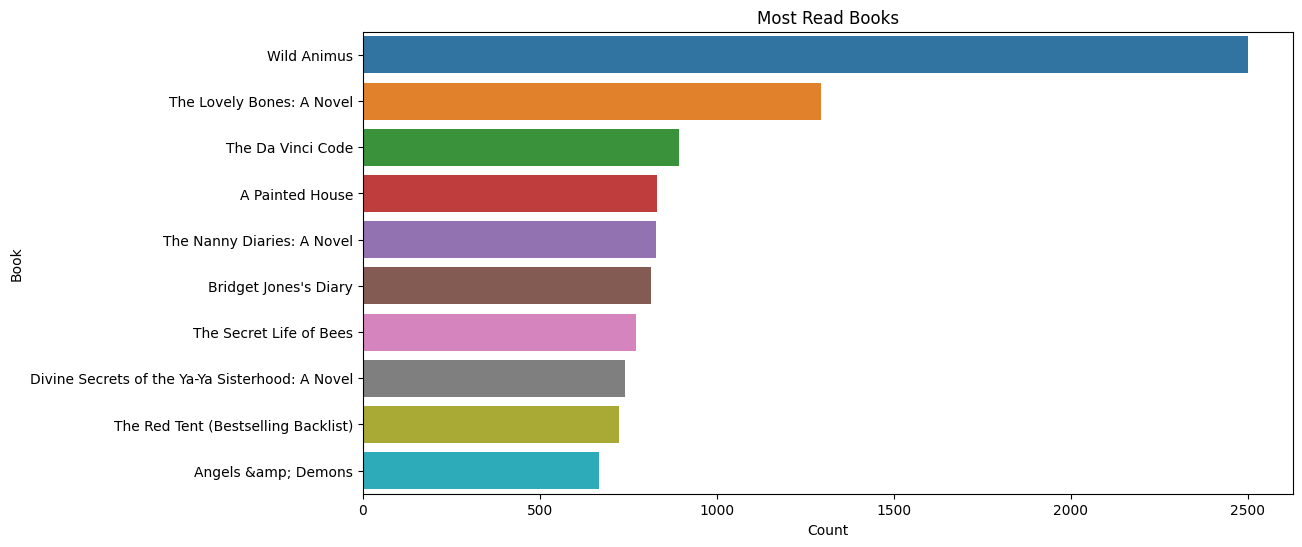

In [ ]:
most_read_books = df_new['Book-Title'].value_counts().reset_index()
most_read_books.columns = ['Book','Count']
plt.figure(figsize=(12,6))
plt.title('Most Read Books')
sns.barplot(x = 'Count', y = 'Book', data = most_read_books.head(10))

Visualizing the top 10 publishers.

<Axes: xlabel='Count', ylabel='Publisher'>

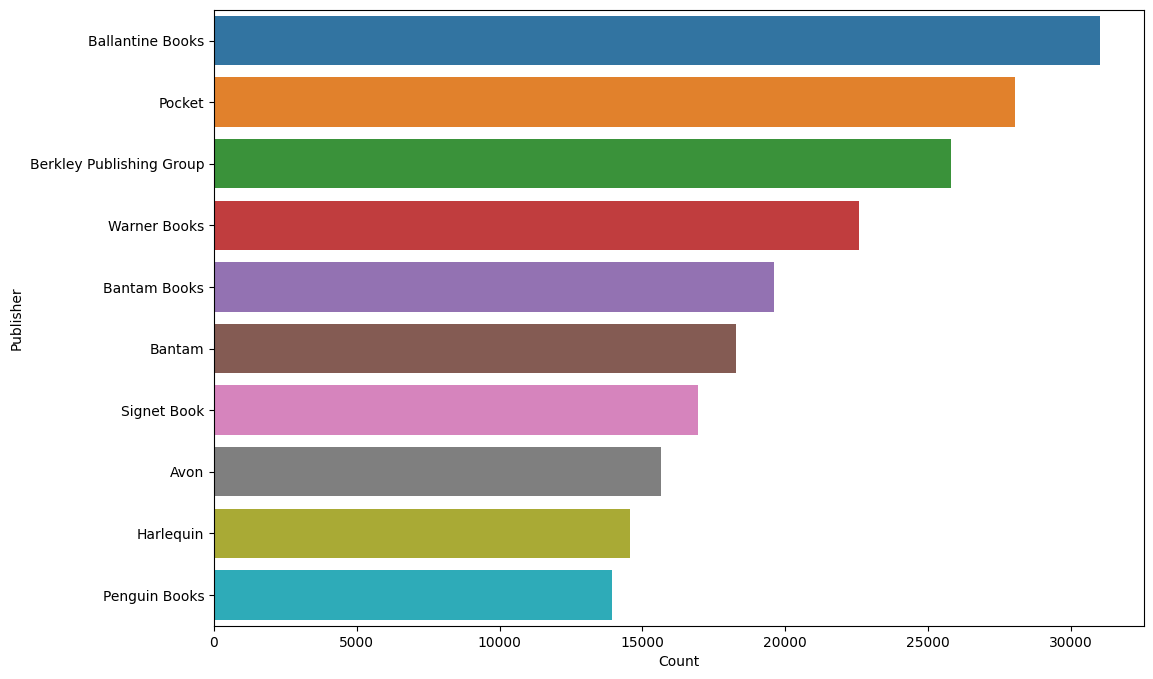

In [ ]:
top_publishers = df_new['Publisher'].value_counts().reset_index()
top_publishers.columns = ['Publisher' , 'Count']
top_publishers = top_publishers.sort_values('Count', ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(x = 'Count', y = 'Publisher', data = top_publishers.head(10))

Top rated books.

<Figure size 1200x800 with 0 Axes>

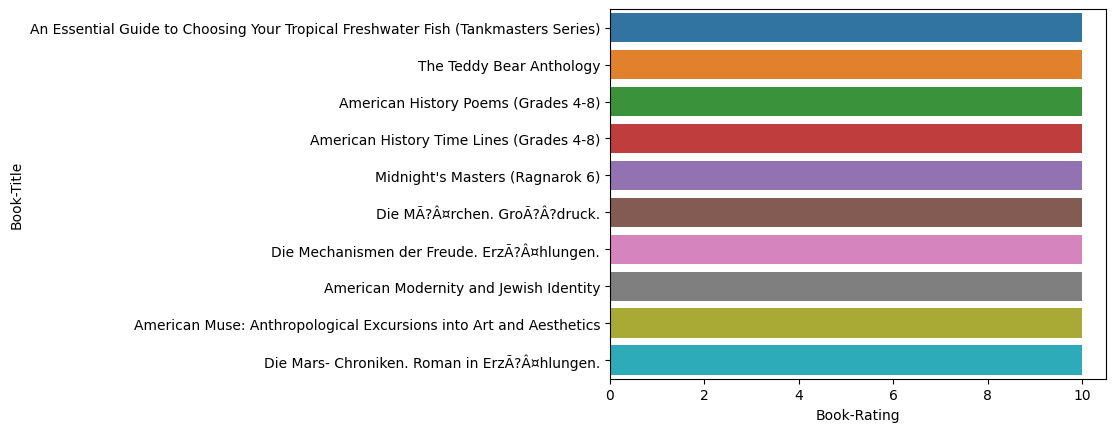

<Figure size 1200x800 with 0 Axes>

In [ ]:
top_rated = df_new[['Book-Title','Book-Rating']]
top_rated = top_rated.groupby('Book-Title', as_index = False)['Book-Rating'].mean()
top_rated = top_rated.sort_values('Book-Rating', ascending=False).reset_index()
top_rated = top_rated[['Book-Title','Book-Rating']]
sns.barplot(x = 'Book-Rating', y= 'Book-Title', data = top_rated.head(10))
plt.figure(figsize=(12,8))

Top Rated authors.

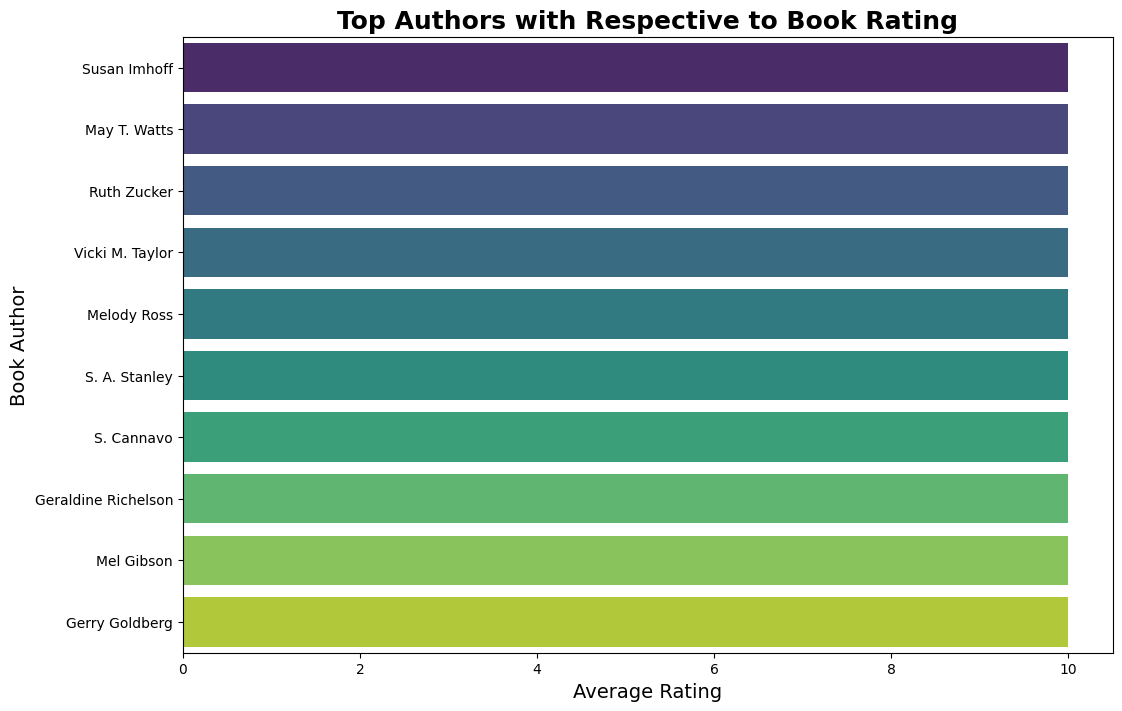

In [ ]:
top_rated_authors = df_new[['Book-Author','Book-Rating']]
top_rated_authors = top_rated_authors.groupby('Book-Author', as_index = False)['Book-Rating'].mean()
top_rated_authors = top_rated_authors.sort_values('Book-Rating',ascending = False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Book-Rating', y='Book-Author', data=top_rated_authors.head(10), palette='viridis')
plt.title('Top Authors with Respective to Book Rating', fontsize=18, fontweight='bold')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Book Author', fontsize=14)
plt.show()

Which year did the most books published.

Top 10 Years with the Most Published Books:
    Year  Book Count
82  2002       73600
81  2001       61929
79  1999       57400
83  2003       57275
80  2000       54680
78  1998       47817
76  1996       44511
77  1997       44241
75  1995       40121
74  1994       34161


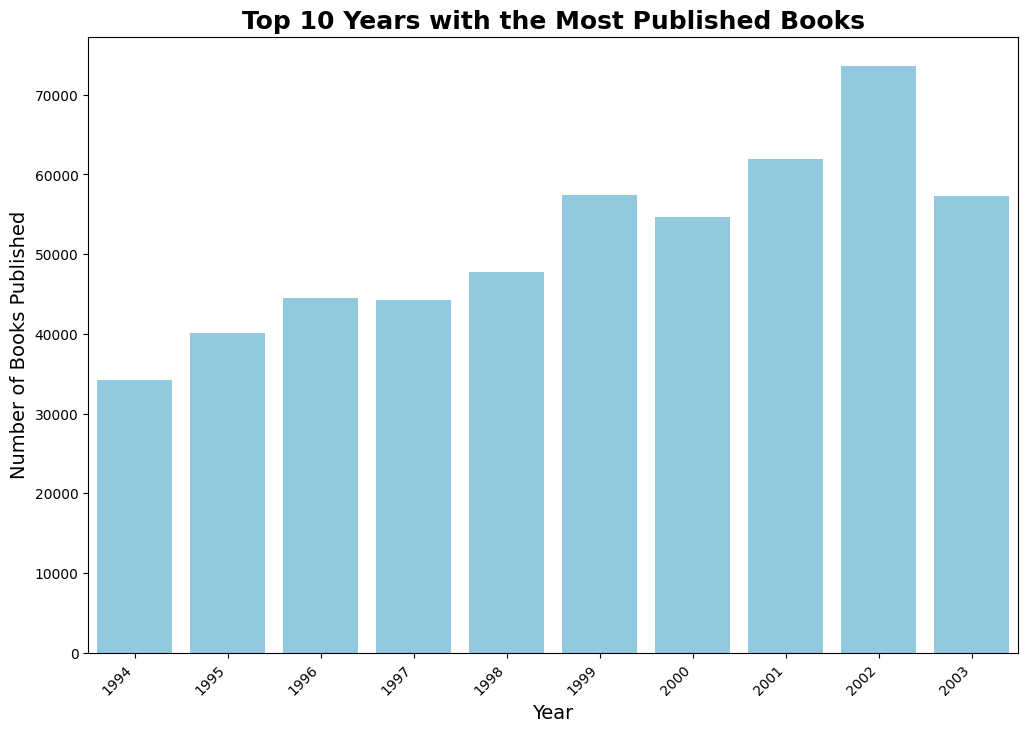

In [ ]:
books_published_per_year = df_new.groupby('Year-Of-Publication')['Book-Title'].count().reset_index()
books_published_per_year.columns = ['Year','Book Count']
top_years = books_published_per_year.sort_values(by='Book Count', ascending=False).head(10)
print('Top 10 Years with the Most Published Books:')
print(top_years)
plt.figure(figsize=(12,8))
sns.barplot(x = 'Year', y = 'Book Count', data = top_years.head(10), color = 'skyblue')
plt.title('Top 10 Years with the Most Published Books', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Books Published', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

The age distribution of the users.

<Axes: title={'center': 'Numbers of users according to the age'}, xlabel='Age', ylabel='Count'>

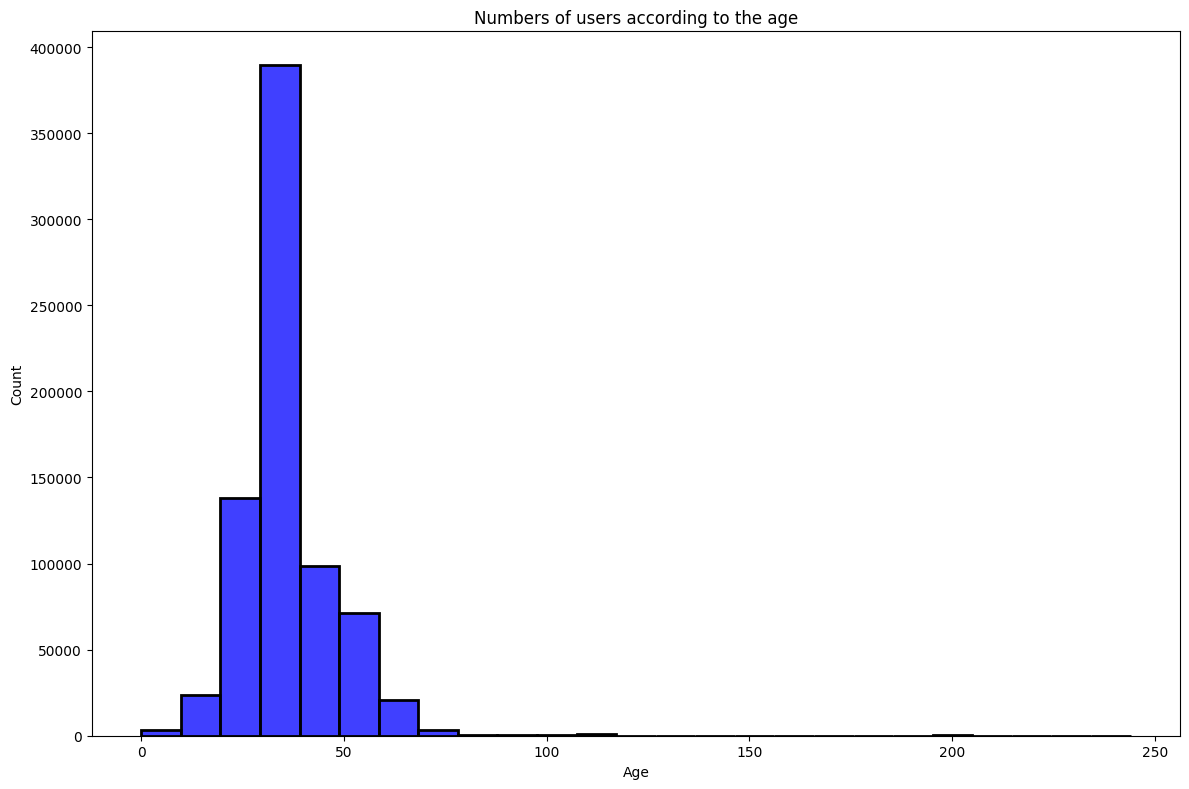

In [ ]:
user_age = df_new.Age
plt.figure(figsize=(12,8), tight_layout=True)
plt.title('Numbers of users according to the age')
sns.histplot(user_age, bins = 25, linewidth = 2, color = 'blue', edgecolor = 'black')

### Popularity based recommendation system.

In [68]:
df_p = df_new.groupby('Book-Title').count()['Book-Rating'].reset_index()
df_p.columns = ['Book-Title', 'Num-Rating']
df_p

,Book-Title,Num-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Beyond IBM: Leadership Marketing and Finance ...,1
2,Earth Prayers From around the World: 365 Pray...,10
3,Final Fantasy Anthology: Official Strategy Gu...,4
4,Good Wives: Image and Reality in the Lives of...,10
...,...,...
89002,Ã?Â?ber die Freiheit.,1
89003,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...,1
89004,Ã?Â?bermorgen.,1
89005,Ã?Â?rger mit Produkt X. Roman.,4


In [69]:
avg_rating = df_new.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.columns = ['Book-Title', 'Avg-Rating']
avg_rating

<ipython-input-69-a4c69a539449>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating = df_new.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Beyond IBM: Leadership Marketing and Finance ...,0.00
2,Earth Prayers From around the World: 365 Pray...,5.00
3,Final Fantasy Anthology: Official Strategy Gu...,5.00
4,Good Wives: Image and Reality in the Lives of...,3.20
...,...,...
89002,Ã?Â?ber die Freiheit.,7.00
89003,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...,10.00
89004,Ã?Â?bermorgen.,0.00
89005,Ã?Â?rger mit Produkt X. Roman.,5.25


In [70]:
popular_df = df_p.merge(avg_rating, on = 'Book-Title')
popular_df

,Book-Title,Num-Rating,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
2,Earth Prayers From around the World: 365 Pray...,10,5.00
3,Final Fantasy Anthology: Official Strategy Gu...,4,5.00
4,Good Wives: Image and Reality in the Lives of...,10,3.20
...,...,...,...
89002,Ã?Â?ber die Freiheit.,1,7.00
89003,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...,1,10.00
89004,Ã?Â?bermorgen.,1,0.00
89005,Ã?Â?rger mit Produkt X. Roman.,4,5.25


In [71]:
popular_df = popular_df[popular_df['Num-Rating']>=250].sort_values('Avg-Rating', ascending = False).head(50)

In [72]:
popular_df = popular_df.merge(df_new, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Num-Rating','Avg-Rating']]

In [73]:
popular_df

,Book-Title,Book-Author,Image-URL-M,Num-Rating,Avg-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
428,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
815,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,274,5.748175
1089,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,346,5.488439
1435,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
1991,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
2272,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,354,4.906780
2626,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
3201,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,503,4.695825
3704,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,894,4.652125


In [74]:
popular_df['Book-Title'][0:5]

0       Harry Potter and the Prisoner of Azkaban (Book 3)
428          Harry Potter and the Goblet of Fire (Book 4)
815        Harry Potter and the Sorcerer's Stone (Book 1)
1089    Harry Potter and the Order of the Phoenix (Boo...
1435     Harry Potter and the Chamber of Secrets (Book 2)
Name: Book-Title, dtype: object

###Collaborative Filtering Based Recommendation System.

In [ ]:
df_collab = df_new.groupby('User-ID').count()['Book-Title'] > 200
df_user = df_collab[df_collab].index

In [ ]:
filtered_rating = df_new[df_new['User-ID'].isin(df_user)]
filtered_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
80,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",35.0
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",35.0
82,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,11676,8,"n/a, n/a, n/a",35.0
83,0771074670,Nights Below Station Street,David Adams Richards,1988,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,http://images.amazon.com/images/P/0771074670.0...,http://images.amazon.com/images/P/0771074670.0...,11676,0,"n/a, n/a, n/a",35.0
84,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",35.0


In [ ]:
df_famous = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >=50
famous_book = df_famous[df_famous].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_book)]

In [ ]:
final_ratings.drop_duplicates()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",35.0
84,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",35.0
88,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,11676,6,"n/a, n/a, n/a",35.0
89,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,11676,0,"n/a, n/a, n/a",35.0
90,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,11676,10,"n/a, n/a, n/a",35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
578215,044651652X,The Bridges of Madison County,Robert James Waller,1992,Warner Books,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...,54218,0,"kaiserslautern, rheinland-pfalz, germany",27.0
578216,0743437640,The Mulberry Tree,Jude Deveraux,2003,Pocket,http://images.amazon.com/images/P/0743437640.0...,http://images.amazon.com/images/P/0743437640.0...,http://images.amazon.com/images/P/0743437640.0...,54218,0,"kaiserslautern, rheinland-pfalz, germany",27.0
578218,0345391055,Disclosure,Michael Crichton,1994,Ballantine Books,http://images.amazon.com/images/P/0345391055.0...,http://images.amazon.com/images/P/0345391055.0...,http://images.amazon.com/images/P/0345391055.0...,54218,0,"kaiserslautern, rheinland-pfalz, germany",27.0
578229,0446610542,The Bachelor (Warner Books Contemporary Romance),Carly Phillips,2002,Warner Forever,http://images.amazon.com/images/P/0446610542.0...,http://images.amazon.com/images/P/0446610542.0...,http://images.amazon.com/images/P/0446610542.0...,54218,0,"kaiserslautern, rheinland-pfalz, germany",27.0


In [ ]:
df_pt = final_ratings.pivot_table(index = 'Book-Title',columns = 'User-ID', values='Book-Rating' )

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pt.fillna(0, inplace = True)
df_pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similarity_scores = cosine_similarity(df_pt)
similarity_scores.shape

(539, 539)

In [ ]:
def recommend(book_name):
  index = np.where(df_pt.index==book_name)[0][0]
  similar_items  = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse = True)[1:6]

  data = []
  for i in similar_items:
   item = []
   final_df = df_new[df_new['Book-Title'] == df_pt.index[i[0]]]
   item.extend(list(final_df.drop_duplicates('Book-Title')['Book-Title'].values))
   item.extend(list(final_df.drop_duplicates('Book-Title')['Book-Author'].values))
   item.extend(list(final_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

   data.append(item)

  return data


In [ ]:
recommend('1984')

[["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ["The Bonesetter's Daughter",
  'Amy Tan',
  'http://images.amazon.com/images/P/0399146431.01.MZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg']]